# K-nearest neighbors

The KNN classifier is a simple yet effective non-parametric method of supervised learning. 

The algorithm depends on the "K" nearest datapoints. A classification can be achieved by taking a vote, the majority class within that region is the winner.

The model bases predictions on the training data, hence the training set needs to be available at test time.

## Dataset

In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

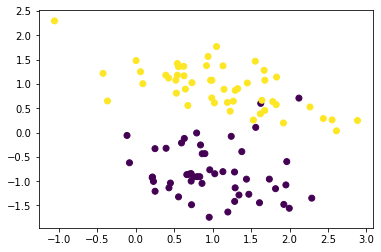

In [2]:
np.random.seed(212)
feats = 2
k_near = 5

X, y = make_classification(n_samples=100, n_features=feats, n_informative=feats, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1)

n = 200
grid_x = np.linspace(X[:,0].min(), X[:,0].max(), n)
grid_y = np.linspace(X[:,1].min(), X[:,1].max(), n)
G = np.array([i.flatten() for i in np.meshgrid(grid_x, grid_y)]).T

plt.scatter(X[:,0], X[:,1], c=y)

## KNN numpy

In [3]:
class KNN_np:
    def __init__(self, k):
        self.k = k
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i, point in enumerate(X):
            dist = self.distance(point, self.X_train)
            knn = np.argsort(dist)[:self.k]
            k_nearest = self.y_train[knn]
            count = np.array([np.array([j, (j==k_nearest).sum()]) for j in np.unique(k_nearest)])
            y_pred[i] = count[count[:,1].argmax(), 0]
            
        return y_pred
    
    @staticmethod
    def distance(xy1, xy2):
        '''Computes euclidean distance'''
        return (((xy1 - xy2)**2).sum(1))**0.5

In [4]:
k_near = 5
model_np = KNN_np(k=k_near)
model_np.train(X, y)

In [5]:
y_pred = model_np.predict(G)

## Sci-kit learn

In [6]:
model_sk = KNeighborsClassifier(n_neighbors=k_near).fit(X, y)

In [7]:
y_pred_sk = model_sk.predict(G)

## Comparison

In [8]:
%timeit model_np.predict(G)

1.16 s ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit model_sk.predict(G)

679 ms ± 7.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[Text(0.5, 1.0, 'From scratch')]

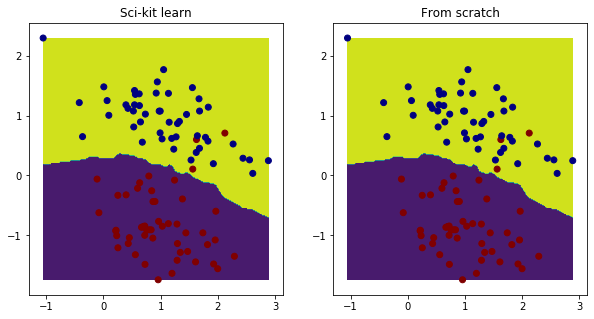

In [10]:
f, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].contourf(grid_x, grid_y, y_pred_sk.reshape(n,n))
ax[0].scatter(X[:,0], X[:,1], c=y, cmap='jet_r')
ax[0].set(title='Sci-kit learn')

ax[1].contourf(grid_x, grid_y, y_pred.reshape(n,n))
ax[1].scatter(X[:,0], X[:,1], c=y, cmap='jet_r')
ax[1].set(title='From scratch')